<a href="https://colab.research.google.com/github/mk7890/Machine-Learning-1/blob/main/ML_1_polynomial_regression_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, TweedieRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


In [3]:
# url = 'https://www.kaggle.com/datasets/shashwatwork/wild-blueberry-yield-prediction-dataset'
# import kagglehub
# # Download latest version
# path = kagglehub.dataset_download("shashwatwork/wild-blueberry-yield-prediction-dataset")
# print("Path to dataset files:", path)

blueBerryData = pd.read_csv('/content/WildBlueberryPollinationSimulationData.csv')
blueBerryData.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [4]:
blueBerryData.shape

(777, 18)

In [5]:
blueBerryData['yield'].max()

8969.401842

In [6]:
blueBerryData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

In [7]:
blueBerryData.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [8]:
blueBerryData.isnull().sum()

,0
Row#,0
clonesize,0
honeybee,0
bumbles,0
andrena,0
osmia,0
MaxOfUpperTRange,0
MinOfUpperTRange,0
AverageOfUpperTRange,0
MaxOfLowerTRange,0


In [9]:
# dropping the 'Row#' column
blueBerryData.drop('Row#', axis=1, inplace=True)

# DATA ENCODING

In [10]:
# data is all in numeric

# DATA ANALYSIS

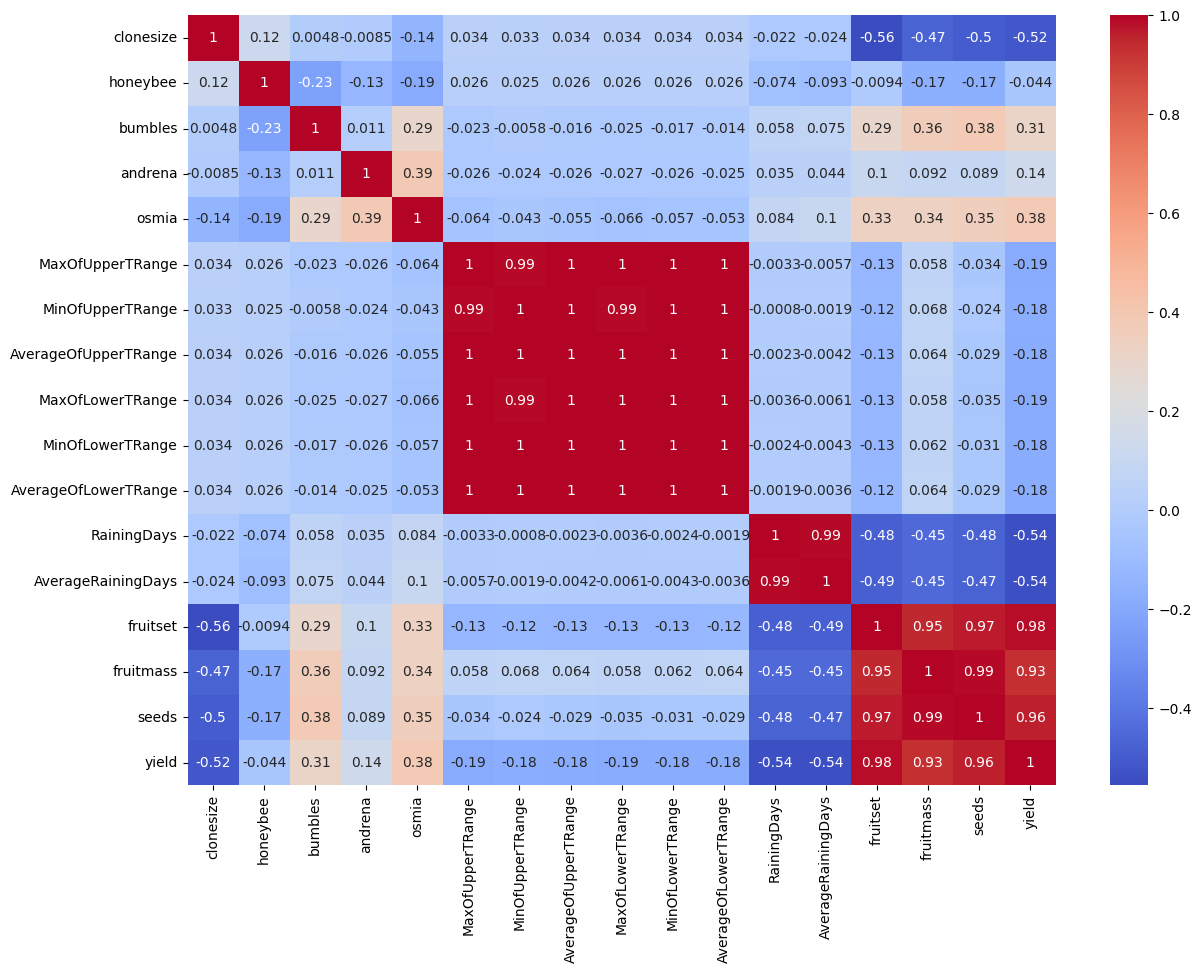

In [11]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(blueBerryData.corr(), cmap='coolwarm', annot=True)
plt.show()


# MODELING

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [13]:
blueBerryData.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [14]:
# Define features (X) and target (y)
X = blueBerryData.drop(columns=['yield'])  # Independent variables
y = blueBerryData['yield']  # Target variable


In [15]:
#Splitting the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Feature Scaling

In [16]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression

In [17]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [18]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = regr.predict(X_test)
y_pred[:10]

array([4196.78125   , 6704.375     , 6317.50390625, 6892.44921875,
       6870.2890625 , 6676.26171875, 4906.10546875, 7625.81640625,
       3879.75390625, 6015.45703125])

In [20]:
#The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-9.15554984e+00  5.34417511e+01  3.36391269e+02  3.83189390e+02
  5.42749419e+02  4.71405567e+13 -7.29358123e+13  4.70212186e+13
 -1.14910386e+14  3.75476539e+13  4.70212186e+13  2.37943354e+00
 -1.10904163e+03  8.54888642e+03 -2.75682975e+04  3.60846487e+02]


In [21]:
#The mean squared error
print('Mean squared error:', mean_squared_error(y_test, y_pred))

Mean squared error: 16846.845918862124


In [22]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 97.80


In [23]:
#The intercept
print('Intercept', regr.intercept_)

Intercept -32914852992064.004


In [24]:
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

R2 score: 0.9913322670828816


# POLYNOMIAL REGRESSION

In [25]:

# Apply polynomial feature transformation
degree = 2  # Choose the degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


In [26]:
# Train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [27]:
# Predict the target on the test set
y_pred = model.predict(X_test_poly)
y_pred[:10]

array([4284.5 , 6608.25, 6205.  , 6968.75, 6583.25, 6550.25, 4723.5 ,
       7741.25, 3793.  , 6025.  ])

In [28]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 6894335580315566735360.00
R-squared: -3547148216287488.50


In [29]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 6647891525.22


Cross Validation

In [31]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Define the degree of the polynomial
degree = 2

# Create a pipeline to handle scaling, polynomial transformation, and regression
pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=degree),
    LinearRegression()
)

# Define cross-validation strategy (e.g., 5-fold CV)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert negative scores to positive (since sklearn returns negative errors)
mae_scores = -cv_scores

print(f"Cross-Validation MAE Scores: {mae_scores}")
print(f"Mean MAE: {np.mean(mae_scores):.2f}")
print(f"Standard Deviation of MAE: {np.std(mae_scores):.2f}")


Cross-Validation MAE Scores: [9.43175834e+08 1.40945982e+02 2.56588441e+09 3.72729074e+02
 2.61803616e+02]
Mean MAE: 701812203.68
Standard Deviation of MAE: 1001063595.21


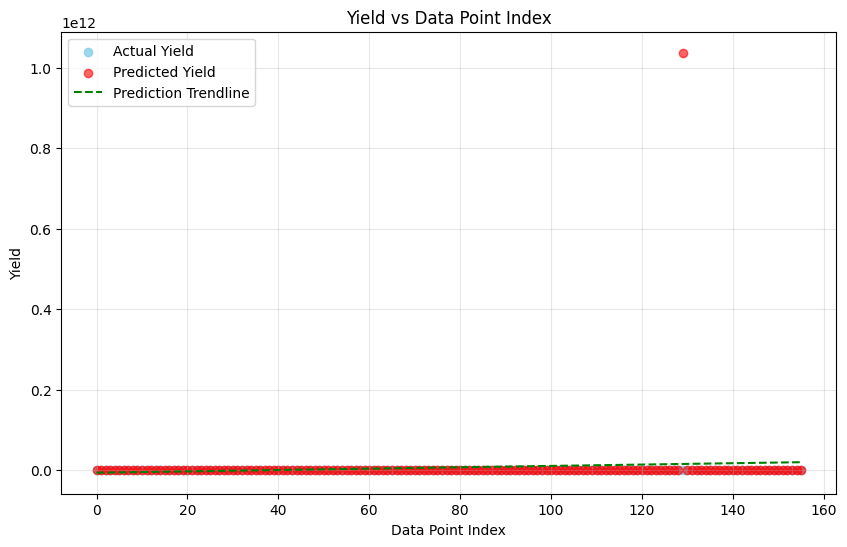

In [30]:
# Create a scatter plot for actual and predicted values
plt.figure(figsize=(10, 6))
# Scatter plot for actual yield
plt.scatter(range(len(y_test)), y_test, color='skyblue', label='Actual Yield', alpha=0.8)
# Scatter plot for predicted yield
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Yield', alpha=0.6)
# Trendline for predicted yield
z = np.polyfit(range(len(y_pred)), y_pred, 1)  # Linear trendline
p = np.poly1d(z)
plt.plot(range(len(y_pred)), p(range(len(y_pred))), color='green', linestyle='--', label='Prediction Trendline')
# Add labels, legend, and grid
plt.title("Yield vs Data Point Index")
plt.xlabel("Data Point Index")
plt.ylabel("Yield")
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()


# Try Cross validation, Mean absolute error